# iPhone sales by region 2015 to 2022 (million)

In [1]:
import requests, openpyxl
from bs4 import BeautifulSoup
import numpy as np

scarping data from `https://www.businessofapps.com/data/apple-statistics/`

In [2]:
excel = openpyxl.Workbook()
sheet = excel.active
sheet.title = "Highest_Grossing_Films"
sheet.append(["Year", "Americans", "Europe", "China", "Japan", "Rest of Asia Pacific"])

In [3]:
try:
    response = requests.get("https://www.businessofapps.com/data/apple-statistics/")
    soup = BeautifulSoup(response.text, "html.parser")
    table = soup.find("div", id="footable_parent_81386")
    data = table.find("tbody").find_all("tr")
    
    for i in data:
        rows = i.find_all("td")
        r = []
        for row in rows:
            r.append(row.get_text(strip=True))
        sheet.append(r)
    
except Expection as e:
    print(e)

**save the grabed data into Excel file**

In [4]:
excel.save("apple_sales.xlsx")

**convert the saved excel into `pandas DataFrame`**

In [5]:
import pandas as pd

df = pd.read_excel("apple_sales.xlsx")
df

,Year,Americans,Europe,China,Japan,Rest of Asia Pacific
0,2015,70.3,33.9,71.2,15.0,12.2
1,2016,62.9,34.6,58.3,14.6,14.8
2,2017,69.3,36.8,51.6,15.3,13.3
3,2018,74.8,38.2,44.8,14.9,14.2
4,2019,65.7,36.3,31.4,14.8,12.8
5,2020,73.3,37.3,34.9,14.7,14.0
6,2021,84.3,56.1,42.9,17.8,17.3
7,2022,99.8,56.0,43.6,15.2,17.2


**Let's Visualize**

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

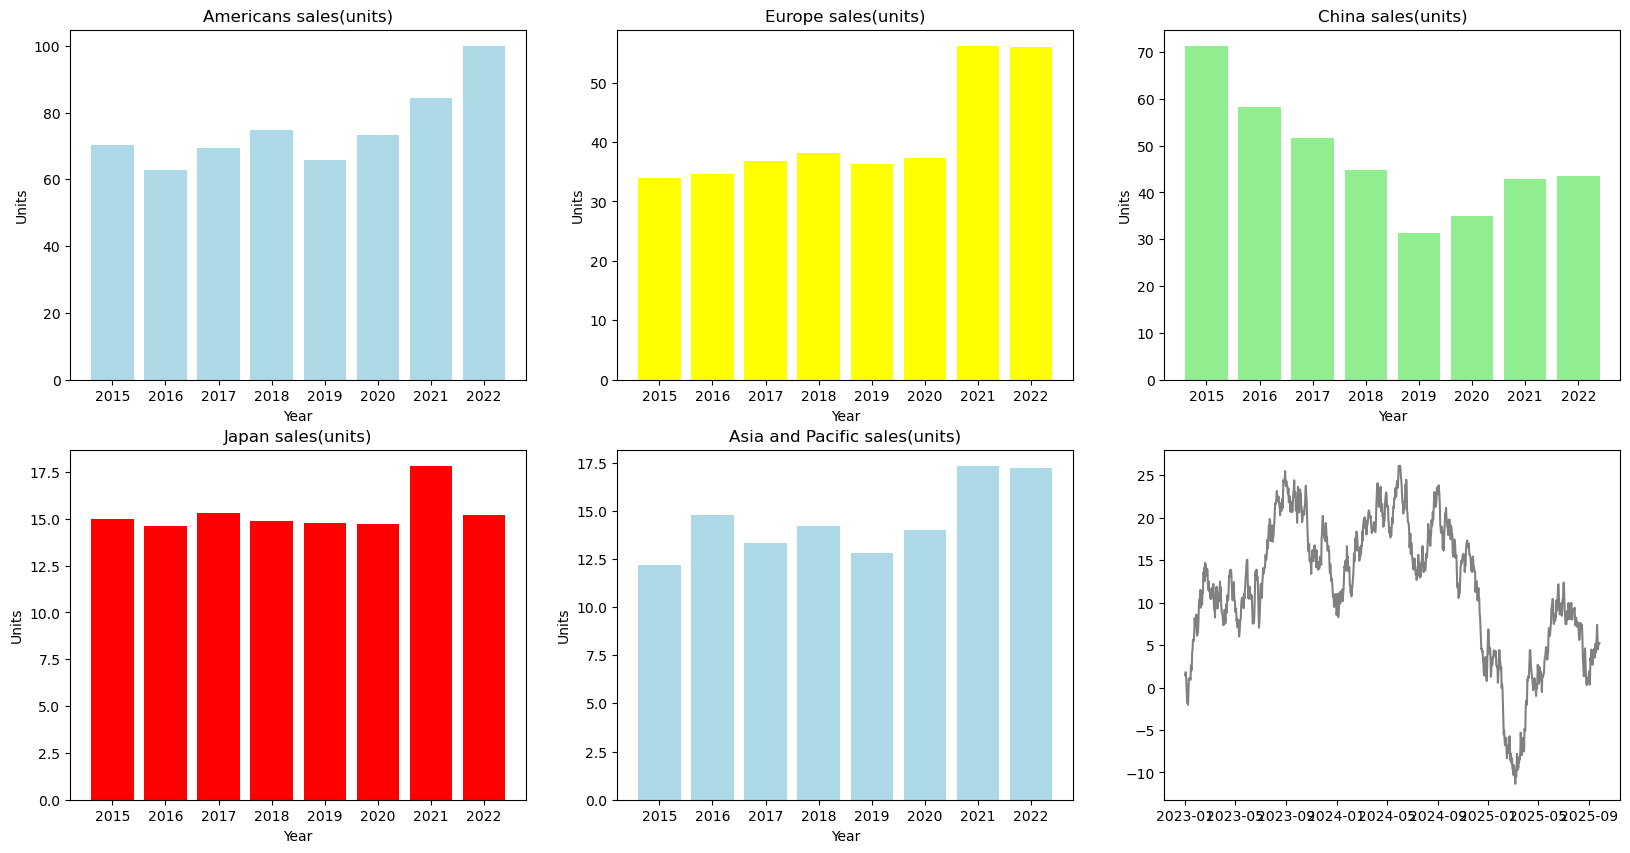

In [7]:
fig, ax = plt.subplots(nrows= 2,
                       ncols= 3,
                       figsize= (20,10))

ax[0,0].bar(df["Year"], df["Americans"], color=["lightblue"])
ax[0,0].set_title("Americans sales(units)")
ax[0,0].set_xlabel("Year")
ax[0,0].set_ylabel("Units")

ax[0,1].bar(df["Year"], df["Europe"], color=["yellow"])
ax[0,1].set_title("Europe sales(units)")
ax[0,1].set_xlabel("Year")
ax[0,1].set_ylabel("Units")

ax[0,2].bar(df["Year"], df["China"], color=["lightgreen"])
ax[0,2].set_title("China sales(units)")
ax[0,2].set_xlabel("Year")
ax[0,2].set_ylabel("Units")

ax[1,0].bar(df["Year"], df["Japan"], color=["red"])
ax[1,0].set_title("Japan sales(units)")
ax[1,0].set_xlabel("Year")
ax[1,0].set_ylabel("Units")

ax[1,1].bar(df["Year"], df["Rest of Asia Pacific"], color=["lightblue"])
ax[1,1].set_title("Asia and Pacific sales(units)")
ax[1,1].set_xlabel("Year")
ax[1,1].set_ylabel("Units")

ts = pd.Series(np.random.randn(1000),
               index= pd.date_range("1/1/2023",periods=1000))
ts = ts.cumsum()
ax[1,2].plot(ts, color="grey")
plt.show();

**Sales By different regions**

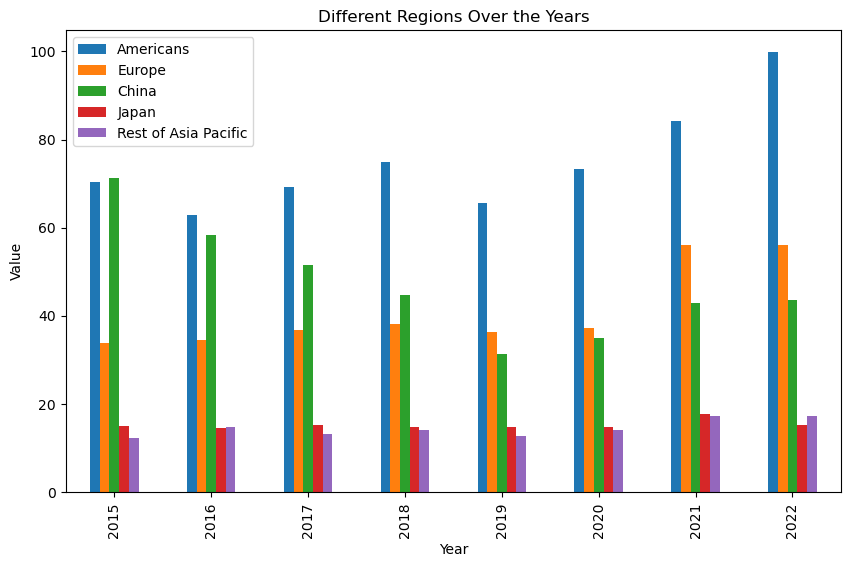

In [8]:
df.set_index('Year', inplace=True)
df.plot(kind='bar',y=["Americans", "Europe", "China", "Japan", "Rest of Asia Pacific"], figsize=(10, 6))

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Different Regions Over the Years")

plt.show();